<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/master/Training_held_out_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentador de audios

In [1]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pathlib import Path

In [14]:
def audio_segmenter(folder,Audiofile,digit,esx=7000,db=10):
    x, fs = librosa.core.load(f'{folder}/{Audiofile}.wav',sr=16000)
    #display(Audio(x,rate=fs))
    split_points = librosa.effects.split(x,top_db=db)
    Path(f"Particiones_grabadas/Segmentos_{digit}").mkdir(parents=True, exist_ok=True)
    for i,split in enumerate(split_points):
        xplot = np.zeros_like(x)
        xplot[split[0]-esx:split[1]+esx] = x[split[0]-esx:split[1]+esx]
        #plt.plot(xplot)
        #display(Audio(x[split[0]-esx:split[1]+esx],rate=fs))
        sf.write(f'Particiones_grabadas/Segmentos_{digit}/{Audiofile}-{i}.wav',x[split[0]-esx:split[1]+esx],fs)
    return x,fs

In [15]:
for k in range(10):
    x,fs = audio_segmenter('Grabaciones/Audios_Anto',f'anto-{k}',k)
for k in range(10):
    x,fs = audio_segmenter('Grabaciones/Audios_Caro',f'living_caro_{k}',k)
for k in range(10):
    x,fs = audio_segmenter('Grabaciones/Audios_Franco',f'franco-{k}',k)
for k in range(10):
    x,fs = audio_segmenter('Grabaciones/Audios_Lucho',f'Lucho-{k}',k)
for k in range(10):
    x,fs = audio_segmenter('Grabaciones/Audios_LuchoPasillo',f'Luchopasillo-{k}',k)

In [19]:
# La /s/ Linguoalveolar sorda de "six" es más dificil de detectar que el resto,
# asi que subimos el umbral de DBs para hacer la deteccion
x,fs = audio_segmenter('Grabaciones/Audios_Lucho',f'Lucho-6',6,7000,20)
x,fs = audio_segmenter('Grabaciones/Audios_LuchoPasillo',f'Luchopasillo-6',6,7000,20)


9

In [ ]:
x,fs = audio_segmenter('Grabaciones/Audios_Franco',f'franco-6',k,7000,20)

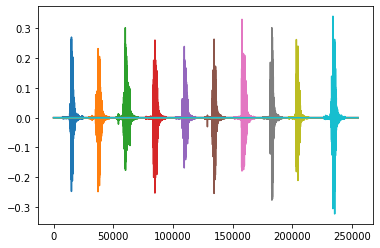

In [23]:
display(Audio(x,rate=fs))
plt.figure(figsize=(15,5))
plt.plot(x)